# Two-Qubit Geometric Algebra

## Preliminaries

The first order of business is to import the necessary modules.  The following code requires a local installation of the "clifford" python package.  In anaconda, this can be accomplished using the following command.
    
    conda install -c conda-forge clifford
    
The presents of module QuantumGA.py in the same directory as this notebook or a directory on the PYTHONPATH is also required.

In [1]:
from QuantumGA import _e1, _e2, _e3, _e12, _e13, _e23, _e123, _zero, _one 
from QuantumGA import tract, mvec, dyad, places, linelen, comm, phase2
from numpy import sin, cos, sqrt, e, pi, array

The next two commands affect the display formatting and can be changed at any time to satisfy the user's requirements.

In [2]:
places(8)
linelen(120)

Now define the primitive blades that we will be using.

In [3]:
e1 = _e1
e2 = _e2
e3 = _e3

e12 = _e12
e23 = _e23
e13 = _e13

e123 = _e123

i = e123
zero = _zero
one = _one

## Primitive spin states and the 4x4 specular matrix

Define the spin-up, spin-not-up, spin-down and spin-not-down states (in that order).  Note: further information about our naming convections can be found in the document SingleQubitGA.pdf.

In [4]:
u_ket = (1+e3)/2
n_ket = (1-e3)/2
d_ket = (e1+e13)/2
p_ket = (e1-e13)/2

The single-qubit states can be extended to include an additional dimension by using the Kronecker product, $\otimes$. Programmatically we implement this capability through the definition of a new python class we call a *dyad*.  To create a new dyad one needs to specify both a *left* multivector and a *right* multivector   

In [5]:
u_d = dyad(u_ket, d_ket)

Displaying the result shows that, in this case, it consists of four individual pieces, each having a blade on either side of a small 'o' symbol.  The little o is a stand-in for the Kronecker product $\otimes$ which is not an ASCII character. 

In [6]:
u_d

[(0.25) o (1.0*e1)] +
[(0.25*e3) o (1.0*e1)] +
[(0.25) o (1.0*e13)] +
[(0.25*e3) o (1.0*e13)]

Displaying a dyad in the above format is informative, but it can become both combersome and confusing.  To help organize the individual *dyadic blades* into more complex *dyadic multivectors* we introduce the *dense* method.  This function "condenses" the output as much as possible before formatting it as a string. 

In [7]:
u_d.dense(2)

[(0.5 + 0.5*e3) o (0.5*e1 + 0.5*e13)]

The parameter $\color{green}{(2)}$ is a scaling factor that is applied as multiplier on the left and divisor on the right.  The output should be readable now as u_ket on the left and d_ket on the right.

We calculate with dyads in the same manner as we do with single-qubit states.  Addition and multiplication are done using the standard operators (+ and *).  Hermittian conjugation is accomplished using the unary operator, tilde (~).  For example, the Dirac inner product of the up-down state $\langle u\otimes d\ |\ u\otimes d\rangle$ is easily found.

In [8]:
(~u_d*u_d).dense(2)

[(0.5 + 0.5*e3) o (0.5 + 0.5*e3)]

This result might already be recognizable as the $|u\rangle \otimes |u\rangle$ state.

Starting with the four single-qubit states we combine them two at a time to create the sixteen dyadic specular states.

In [9]:
u_u = dyad(u_ket,u_ket)
u_d = dyad(u_ket,d_ket)
d_u = dyad(d_ket,u_ket)
d_d = dyad(d_ket,d_ket)

u_p = dyad(u_ket,p_ket)
u_n = dyad(u_ket,n_ket)
d_p = dyad(d_ket,p_ket)
d_n = dyad(d_ket,n_ket)

p_u = dyad(p_ket,u_ket)
p_d = dyad(p_ket,d_ket)
n_u = dyad(n_ket,u_ket)
n_d = dyad(n_ket,d_ket)

p_p = dyad(p_ket,p_ket)
p_n = dyad(p_ket,n_ket)
n_p = dyad(n_ket,p_ket)
n_n = dyad(n_ket,n_ket)

Taken together the sixteen dyadic specular states are used to generate the 4x4 specular matrix.

In [10]:
S4 = array([[u_u, u_p, p_u, p_p],
            [u_d, u_n, p_d, p_n],
            [d_u, d_p, n_u, n_p],
            [d_d, d_n, n_d, n_n]])

The resulting object is a 4x4 numpy array with dyadic elements. In the following sections we will be using this array along with the *tract* method to create a series of dyadic multivector objects. 

Notice that the four states that make up the leftmost column of this specular matrix define the basis states of a Dirac spinor.  In quantum geometric algebra we prefer to combine all four states into a single dyad and work with it like any other multivector. 

## Making dyadic multivectors from matrices

To translate a typical 4x4 matrix into its multivector equivalent form, we start with a numpy array.  For example the matrix form of a quantum CNOT1 gate. 


In [11]:
cnot1 = array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 1],
               [0, 0, 1, 0]])


The multivector equivalent of this array is generated by contracting it with the 4x4 specular matrix. 

In [12]:
CNOT1 = tract(cnot1, S4)
CNOT1.dense()

[(0.5 + 0.5*e3) o (1.0)] +
[(0.5 - 0.5*e3) o (1.0*e1)]

In multivector form we find that the CNOT1 gate is composed of two simple dyads, $|u\rangle \otimes \mathbb{1}\ $ and $\ |n\rangle \otimes \mathbf{e}1$.  The known left-action of a CNOT1 gate on the $|d\rangle \otimes |u\rangle$  state is to produce the $|d\rangle \otimes |d\rangle$ state.  

In [13]:
(CNOT1*d_u).dense(2)

[(0.5*e1 + 0.5*e13) o (0.5*e1 + 0.5*e13)]

The effect of a CNOT1 gate on the other dyads in the Dirac basis can be evaluated by just overtyping the d_u state the previous cell and running it again.

Another important quantum gate is the Hadamard gate.  We can create a 4x4 array that defines a 2x2 Hadamard gate acting on the first qubit only, $H \otimes \mathbb{1}$.      

In [14]:
hadamard1  = array([[1, 0, 1, 0],
                    [0, 1, 0, 1],
                    [1, 0,-1, 0],
                    [0, 1, 0,-1]])/sqrt(2)

Contracting this matrix with the 4x4 specular matrix generates its dyadic multivector equivalent.

In [15]:
H1 = tract(hadamard1, S4)
H1.dense()

[(0.70710678*e1 + 0.70710678*e3) o (1.0)]

In multivector form this gate is just a unit vector on the left side and the identity on the right side.  The gate's effect on the $|u\rangle \otimes |u\rangle$ state is to create a $|r\rangle \otimes |u\rangle$ state, where $|r\rangle$ is the spin-right state, $(|u\rangle+|d\rangle)\ /\sqrt{2}$.

In [16]:
(H1*u_u).dense(2)

[(0.35355339 + 0.35355339*e1 + 0.35355339*e3 + 0.35355339*e13) o (0.5 + 0.5*e3)]

## Entangled states

Possibly the most mysterious feature of Quantum Mechanics is that of entanglement.  Now that we have the ability to define two-qubit states it is possible to look into entanglement from the quantum geometric algebra perspective.  We start by defining the four dyadic Bell states.

In [17]:
phi_p = (u_u+d_d)/sqrt(2)
phi_m = (u_u-d_d)/sqrt(2)
psi_p = (u_d+d_u)/sqrt(2)
psi_m = (u_d-d_u)/sqrt(2)

Each of the Bell states can be generated from the underlying Dirac states through the use of a well-known quantum circuit which applies a Hadamard gate to the first qubit followed by a CNOT gate.  This circuit can, for example, convert the $|u\rangle \otimes |u\rangle$ state into the $\phi^{+}$ entangled state.

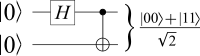

In [18]:
(CNOT1*H1*u_u).dense(2)

[(0.35355339 + 0.35355339*e3) o (0.5 + 0.5*e3)] +
[(0.35355339*e1 + 0.35355339*e13) o (0.5*e1 + 0.5*e13)]

As can be inferred from this example, processing proceeds from right-to-left in a quantum geometric algebra calculation as it does in matrix algebra.  We can display the multivector form of a $\phi^{+}$ state for comparison with the previous result.

In [19]:
phi_p.dense(2)

[(0.35355339 + 0.35355339*e3) o (0.5 + 0.5*e3)] +
[(0.35355339*e1 + 0.35355339*e13) o (0.5*e1 + 0.5*e13)]

We can also calculate the density matrix for one of our Bell states for example the $\psi^{-}$ (singleton) state, $|\psi^{-}\rangle\langle\psi^{-}|$.

In [20]:
(psi_m*~psi_m).dense()

[(0.25) o (1.0)] +
[(-0.25*e1) o (1.0*e1)] +
[(-0.25*e3) o (1.0*e3)] +
[(0.25*e13) o (1.0*e13)]

Because the imaginary unit *i* commutes across a Kronecker product, we can multiply a dyad by *+i* on one side and by *-i* on the other side without changing the characteristics of the product.  The QuantumGA.py module includes a function *ii* that exploits this equivalence and will convert bivector-bivector dyads to vector-vector dyads using the pseudoscalar $\mathbf{e}123$.  We can utilize the ii function to clean-up the previous output a little bit.  

In [21]:
(psi_m*~psi_m).ii().dense()

[(0.25) o (1.0)] +
[(-0.25*e1) o (1.0*e1)] +
[(-0.25*e2) o (1.0*e2)] +
[(-0.25*e3) o (1.0*e3)]

This result may be more recognizable as the Bloch decomposition of the $\Psi^{-}$ density matrix $(\mathbb{1}\otimes\mathbb{1}-\sigma_{1}\otimes\sigma_{1}-\sigma_{2}\otimes\sigma_{2}-\sigma_{3}\otimes\sigma_{3})\ /\ 4$.

We might like to calculate the expectation value or probability for an EPR-type experiment using this maximally entangled state.  To accomplish this we first need to create a dyad which represents the measurement states at Alice's (left) and Bob's (right) analyzer $|AB\ \rangle$.

To produce a dyad in both Alice's and Bob's state we start with a dyad in the up-up state and rotate each side by a separate angle.  To perform this rotation we need to create a *dyadic-rotor* which is easy to do using the built-in *phase2* method.  The phase2 function creates a phase gate which can perform a simple rotation in the $\mathbf{e}13$ plane.  We create a dyadic rotor that specifies two separate rotations.

In [22]:
alice = pi*1/12
bob = pi*5/12
RR = dyad(phase2(alice, -alice),phase2(bob, -bob))

To understand the effect this dyadic rotor has on the up-up spin state we apply it using the sandwich product and display the result.  Notice that each side of this dyad has a different vector component.  

In [23]:
(RR*u_u*~RR).dense(2)

[(0.5 - 0.25*e1 + 0.4330127*e3) o (0.5 - 0.25*e1 - 0.4330127*e3)]

To calculate the probability of obtaining an up-up result (++) given the above combination of Alice's and Bob's states we use the following formula.

<center>$P(AB)\ =\ \langle\psi^{-}|AB\ \rangle\langle AB\ |\ \psi^{-}\rangle$<center>

Some extra typing can be avoided if we notice that the right side of the above equation is just the Dirac outer product of the inner product, $\langle\psi^{-}|AB\ \rangle$. The built-in method *oprod* can be used to calculate the Dirac outer product of this dyadic state with itself.

In [24]:
(~psi_m*RR*u_u).oprod().dense(2)

[(0.1875 + 0.1875*e3) o (0.5 + 0.5*e3)]

This result is equal to $\frac{1}{2}\sin{(bob-alice)}^2$ times the basis state, $|u\rangle\otimes|u\rangle$.  To factor out the basis state from the above product we employ the *uufact* method.

In [25]:
(~psi_m*RR*u_u).oprod().uufact()

[(0.375) o (1.0)]

Readers can easily calculate the probability for obtaining one of the other possible outcomes (+-, -+ or --) by substituting (u_d, d_u or d_d) for u_u in the previous cell.

## Gamma matrices

No discussion of 4x4 arrays can be complete without talking about the Dirac gamma matrices.  We can find the dyadic multivector equivalents for these matrices in the usual way.  First we define a numpy array for, say example, the $\gamma_{1}$ matrix. 

In [26]:
g1 = array([[ 0, 0, 0, 1],
            [ 0, 0, 1, 0],
            [ 0,-1, 0, 0],
            [-1, 0, 0, 0]])

Next we contract this array with the 4x4 specular matrix.

In [27]:
G1 = tract(g1, S4)
G1

[(-1.0*e13) o (1.0*e1)]

The result in this case is a simple dyadic blade with a unit bivector on the left side and a unit vector on the right.  An important characteristic of this dyad is that it squares to negative one (times the dyadic identity element, $\mathbb{1}\otimes\mathbb{1}$).

In [28]:
G1**2

[(-1.0) o (1.0)]

It is a simple matter to translate the other gamma matrices into dyadic multivectors using the 4x4 specular matrix.  However for the sake of brevity we will use the direct way, since we already know what their dyadic forms should be.   

In [29]:
G2 = dyad(-e13, e2)
G3 = dyad(-e13, e3)
G0 = dyad(e3, one)

Notice that the $\gamma_{0}$ matrix squares to positive one (times the identity dyad).

In [30]:
G0**2

[(1.0) o (1.0)]

Together these *gamma dyads* form a 4-dimensional basis set with the signature of Minkowski space, thus the set of gamma dyads gives us the ability to create and manipulate dyadic 4-vectors.

## Exponentiation 

Because many equations in quantum physics involve the exponentials of square matrices, it is important to provide this capability for dyadic multivectors as well.  The QuantumGA.py module implements exponentiation by calculating the dyad's power series up to it's 25th iteration.

In [31]:
e**(G1*pi/3)

[(0.5) o (1.0)] +
[(-0.8660254*e13) o (1.0*e1)]

We see that the rotor $e^{-e13\otimes e1*\pi/3}$, by extension of Euler's formula, is equivalent to $(\mathbb{1}\otimes \mathbb{1})\cos{\pi/3}-(\mathbf{e}13\otimes \mathbf{e}1)\sin{\pi/3}$.

The gamma matrices can also be understood as a set of boost generators in the Lorentz group.  To generate a boost using the matrix algebra one employs the exponential map which uses the complex identity *i*.  The dyadic equivalent of the complex unit is a combination of the pseudoscalar on one side  of the Kronecker product and the multiplicative identity on the other.  Since *i* commutes with all other elements of our algebra it really doesn't matter which side the pseudoscalar appears on, here we choose the left.      

In [32]:
io = dyad(i, one)

Using this complex unit, the following exponential generates a boost of rapidity 1/2 in the $\mathbf{e}1$ direction.  

In [33]:
e**(io*G1*0.5)

[(1.12762597) o (1.0)] +
[(-0.52109531*e2) o (1.0*e1)]

This dyad is hyperbolic and can be read as $(\mathbb{1}\otimes \mathbb{1})\cosh(\frac{1}{2})-(\mathbf{e}2\otimes \mathbf{e}1)\sinh(\frac{1}{2})$.

Having the ability to perform rotations and boosts on dyadic states gives us a powerful tool for studying quantum physics.  Because our dyadic operators are derived directly from the gamma matrices themselves the connection to the standard approach is direct.  Taken together our quantum geometric algebra offers an alternative to the space time algebra (STA) as a way of applying geometric algebra to the theories of SR and QED.

## Sandbox

Readers are encouraged at this point to play around with the various operators and states that we have defined so far.  Verify for yourself that these dyadic multivectors behave in the same manner as the operators and states of the standard approach.  Python programmers can load QuantumGA.py and Definitions.py into any Python 3 environment and explore even more.     